### Origem
* Esse dataset foi obtido através de um web scraping feito na Play Store, e está disponível na plataforma kaggle.

### Motivação
* O processo de raspagem de dados muitas vezes é uma atividade que pode demandar tempo, especialmente nesse caso da playstore onde se tem muitos comentários e aplicativos. Somado a essa velocidade de coleta, outro problema é que as páginas HTML geralmente não têm uma estrutura bem definida e sofrem alterações significativas ao longo do tempo. Por esses fatores, durante esse período de coleta as circunstâncias podem se modificar, levando a coletas de dados incorretas, como a duplicação de aplicativos.

### Objetivo
* Nesse projeto busco trabalhar habilidades de limpeza de dados num dataset gerado por web scraping.

### Bibliotecas
* Pandas
* Numpy
* Seaborn
* Missingno

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

In [2]:
# criando dataframe
df = pd.read_csv('googleplaystore_1.csv')

In [3]:
# analise inicial dos dados
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 1. Quais colunas contém valores nulos?

In [4]:
# compreendendo os tipos de cada coluna e seus valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# obtendo quantos valores nulos eu tenho em cada coluna
df.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

<AxesSubplot: >

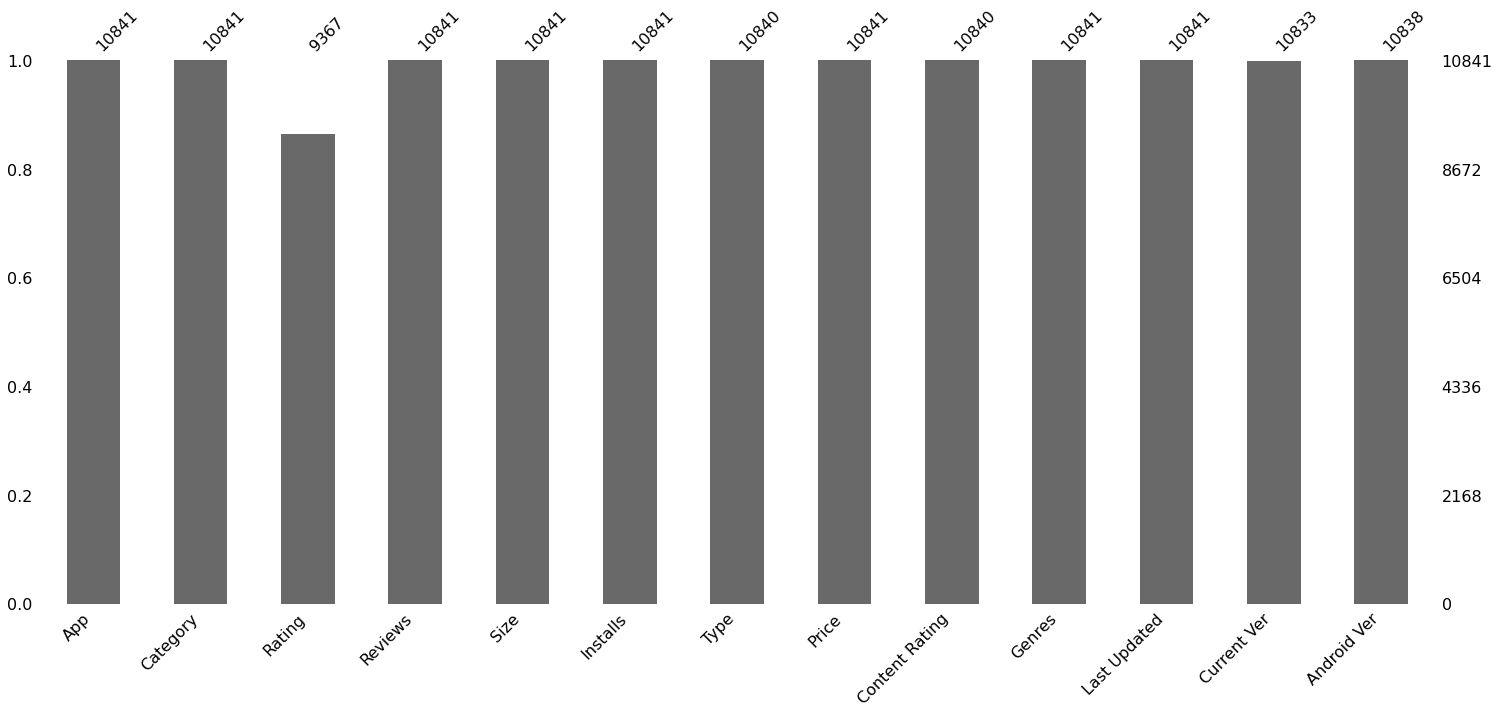

In [6]:
# obtendo o mesmo resultado anterior com gráfico
msno.bar(df)

#### r: Rating, Current Ver, Android Ver, Type e Content Rating.

### 2. Limpe a coluna 'Rating' e as outras colunas contendo valores nulos

Esta é uma atividade de três partes:

* Remova os valores inválidos da coluna 'Rating' (se houver). Basta defini -los como NaN.

* Preencha os valores nulos na coluna de classificação usando o média ()

* Limpe quaisquer outras colunas não numéricas, apenas descartando os valores.

**OBS: Execute as modificações "no local", modificando o DF. Se você cometer um erro, recarregue os dados.**

* Todas as classificações que não estão na faixa de 0 a 5 devem ser substituídas por NAN.

* Para as outras colunas, basta apagar as linhas que contêm valores nulos.

<AxesSubplot: ylabel='Frequency'>

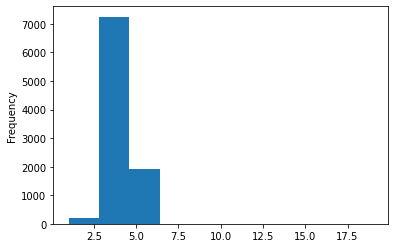

In [7]:
# identificando se existe valores inválidos nas avaliações.
df['Rating'].plot(kind='hist')

<AxesSubplot: >

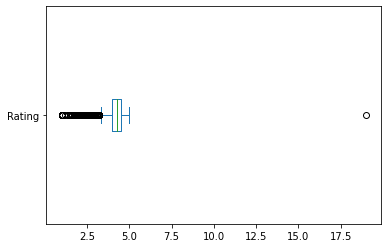

In [8]:
# Aparentemente existe valores acima de 5, que são inválidos

# checando outliers com boxplot
df['Rating'].plot(kind='box', vert=False)

In [9]:
# verificando valores minimos e maximos na coluna 'Rating'
df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

> ***Observando o histograma, boxplot e as descrições da coluna Rating, é possível perceber que existem avaliações inexistentes com valor de até 19.***

> ***Realizando os 3 passos pedidos na atividade...***

In [10]:
# para cada valor na coluna Rating acima de 5, preencha com not a number (NaN)
df.loc[df['Rating'] > 5, 'Rating' ] = np.nan

In [11]:
# Para cada valor nulo ou 'NaN' na coluna Rating, substituir com valor da média de avaliações.
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [12]:
# Apagando linhas com valores nulos em outras colunas
df.dropna(inplace=True)

In [13]:
# verificando o valor máximo para avaliações
df.describe()

,Rating
count,10829.000000
mean,4.191827
std,0.479038
min,1.000000
25%,4.100000
50%,4.200000
75%,4.500000
max,5.000000


In [14]:
# Checando a limpeza e atualização
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


#### Após esses passos a coluna rating foi atualizada com valores válidos e as demais linhas com valores nulos foram removidas.

### 3. Limpe a coluna 'Reviews' e torne-a numérica

* A coluna deste dataframe deveriam ser numérica, mas foi definida como objeto (string). Isso porque os números são expressos com M, ou k para indicar Mega ou kilo.


Por exemplo, ***5M*** deveria ser ***5.000.000.***

In [15]:
# primeiro encontrar as linhas com os valores não numéricos
df.loc[df['Reviews'].str.contains('M')].head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2.9M,21M,"100,000,000+",Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1.4M,21M,"1,000,000,000+",Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1.3M,21M,"10,000,000+",Free,0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device


In [16]:
# Remover os valores inválidos
df.loc[df['Reviews'].str.contains('M'), 'Reviews'].str.replace('M', '').head(3)

139    2.9
152    1.4
189    1.3
Name: Reviews, dtype: object

In [17]:
# converter para número e transformar na casa de milhões
(pd.to_numeric(df.loc[df['Reviews'].str.contains('M'), 'Reviews'].str.replace("M", "")) * 1_000_000).head(3)

139    2900000.0
152    1400000.0
189    1300000.0
Name: Reviews, dtype: float64

In [18]:
# atribuindo esses passos na coluna reviews
df.loc[df['Reviews'].str.contains('M'), 'Reviews'] = pd.to_numeric(
    df.loc[df['Reviews'].str.contains('M'), 'Reviews'].str.replace("M", "")
) * 1_000_000

In [19]:
# convertendo de volta para string para verificar se existe algum erro
df['Reviews'].astype(str)

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10829, dtype: object

In [20]:
# convertendo tudo para numerico como solicitado na atividade
pd.to_numeric(df['Reviews'])

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10829, dtype: float64

### 4. Quantos aplicativos duplicados tem no Dataframe?

* Conte o número de linhas duplicadas. Ou seja, se o aplicativo do Twitter aparecer 2 vezes, isso conta como 2.


* Por default, o pandas só considera duplicatas linhas 100% iguais em todas as colunas



In [22]:
# por isso, vou especificar o conjunto que eu quero, e a forma de seleção usando o keep.
df.duplicated(subset=['App'], keep=False).sum()

1979

Método keep:

* False: marca todas as duplicatas como True.
* first: marca a primeira ocorrencia como False e o restante como True
* last:  marca a ultima ocorrência como False e o restante como True

Saiba mais na documentação oficial do <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html' target='_blank'>Pandas</a>

#### r: 1979

### 5. Elimine apps duplicados mantendo apenas aqueles com maior número de avaliações

* Elimine aplicativos duplicados, mantendo apenas uma cópia de cada, aquele com maior número de avaliações.


Dica: É necessário classificar o dataframe por App e Reviews, e isso mudará a ordem do seu df.

In [24]:
df.sort_values(by=['App', 'Reviews'], inplace=True)

In [30]:
df.loc[df.duplicated(subset=['App'], keep=False) & ~df.duplicated(keep=False)].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
3953,8 Ball Pool,SPORTS,4.5,14200000.0,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
559,95Live -SG#1 Live Streaming App,DATING,4.1,4953,15M,"1,000,000+",Free,0,Teen,Dating,"August 1, 2018",8.7.2,4.2 and up
662,95Live -SG#1 Live Streaming App,DATING,4.1,4954,15M,"1,000,000+",Free,0,Teen,Dating,"August 1, 2018",8.7.2,4.2 and up
4991,A&E - Watch Full Episodes of TV Shows,FAMILY,4.0,29708,19M,"1,000,000+",Free,0,Teen,Entertainment,"July 16, 2018",3.1.4,4.4 and up
4928,AC - Tips & News for Android™,NEWS_AND_MAGAZINES,4.2,23291,14M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"May 24, 2018",3.1.12,4.1 and up
3799,AC - Tips & News for Android™,NEWS_AND_MAGAZINES,4.2,23292,14M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"May 24, 2018",3.1.12,4.1 and up
5448,AP Mobile - Breaking News,NEWS_AND_MAGAZINES,4.5,76616,4M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"May 25, 2017",4.4.3,4.0 and up
3791,AP Mobile - Breaking News,NEWS_AND_MAGAZINES,4.5,76677,4M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"May 25, 2017",4.4.3,4.0 and up


*Observando a tabela e levando o fato de que o dataset foi obtido através de um web scraping, percebe-se que o ultimo valor de cada duplicata é o valor mais atual e que contém um maior número de reviews (é o que o exercício deseja).*

In [31]:
# apagando aplicativos duplicados, mas deixando a ultima duplicata que é o valor desejado
df.drop_duplicates(subset=['App'], keep='last', inplace=True)

In [34]:
# verificando se ainda existe apps duplicados
df.loc[df.duplicated(subset=['App'], keep=False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### 6. Formate a coluna category

* As categorias estão todas em letras maiúsculas e as palavras são separadas por underscores. Transforme a primeira letr em maiúsculo no primeiro caractere e os underscores transformados em espaços em branco.

> Exemplo: AUTO_AND_VEHICLES --> Auto and vehicles. 

> Obs: Além disso, se você encontrar qualquer outro valor errado, transforme-o em uma categoria 'Unknown'.

In [35]:
# removendo underscores
df['Category'] = df['Category'].str.replace("_", " ")

In [36]:
# transformando valores em capitalize
df['Category'] = df['Category'].str.capitalize()

In [41]:
(df['Category']).value_counts()

Category
Family                 1889
Game                    930
Tools                   826
Business                420
Medical                 395
Productivity            374
Personalization         374
Lifestyle               369
Finance                 345
Sports                  327
Communication           315
Health and fitness      288
Photography             281
News and magazines      254
Social                  239
Books and reference     221
Travel and local        219
Shopping                202
Dating                  171
Video players           164
Maps and navigation     131
Food and drink          112
Education               106
Auto and vehicles        85
Libraries and demo       83
Entertainment            83
Weather                  79
House and home           73
Events                   64
Art and design           60
Parenting                60
Comics                   56
Beauty                   53
Name: count, dtype: int64

### 7. Limpe e converta a coluna Installs para o tipo numérico

* Limpe e transforme as instalações como um tipo numérico. Alguns valores em Instalações terão um modificador +. Basta remover a string e respeitar o número original.

> por exemplo +2.500 ou 2.500+ deve ser transformado no número 2500

In [57]:
df['Installs'] = df['Installs'].str.replace("+", "")

In [61]:
df['Installs'] = df['Installs'].str.replace(",", "")

In [62]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191757,27,3M,500,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,Social,4.500000,40467,22M,1000000,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up


In [63]:
pd.to_numeric(df['Installs']) 

8884        500
8532    1000000
324       10000
4541      10000
4636      10000
         ...   
6334     100000
4362      10000
2575    1000000
7559      10000
882     1000000
Name: Installs, Length: 9648, dtype: int64